In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datasist as ds
import matplotlib.pyplot as plt
from scipy import stats
import warnings

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [2]:
df = pd.read_csv('../dastasets/black_friday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Data Cleaning

In [5]:
df = df.drop(['User_ID', 'Product_ID', 'Product_Category_3'], axis=1)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,137
550066,F,55+,1,C,2,0,20,NaN,365


In [6]:
for col in df.columns:
    print(f'For column {col}\n----------------\n')
    print(df[col].value_counts())
    print('\n')

For column Gender
----------------

M    414259
F    135809
Name: Gender, dtype: int64


For column Age
----------------

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


For column Occupation
----------------

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


For column City_Category
----------------

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


For column Stay_In_Current_City_Years
----------------

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


For column Marital_Status
----------------

0    324731
1    225337
Name: Marital_Status, dtype: int64


For column Product_Catego

In [7]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Purchase                           0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [9]:
df['Product_Category_2'] = imputer.fit_transform(df[['Product_Category_2']])

In [10]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [11]:
imputer.statistics_

array([8.])

In [12]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,8.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,8.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,8.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,8.0,368
550064,F,26-35,1,C,3,0,20,8.0,371
550065,F,26-35,15,B,4+,1,20,8.0,137
550066,F,55+,1,C,2,0,20,8.0,365


# Visualization

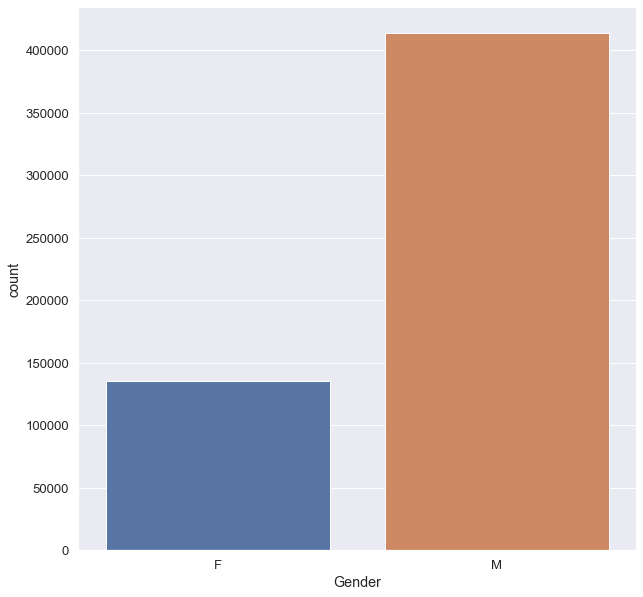

In [13]:
sns.countplot(x='Gender', data=df)

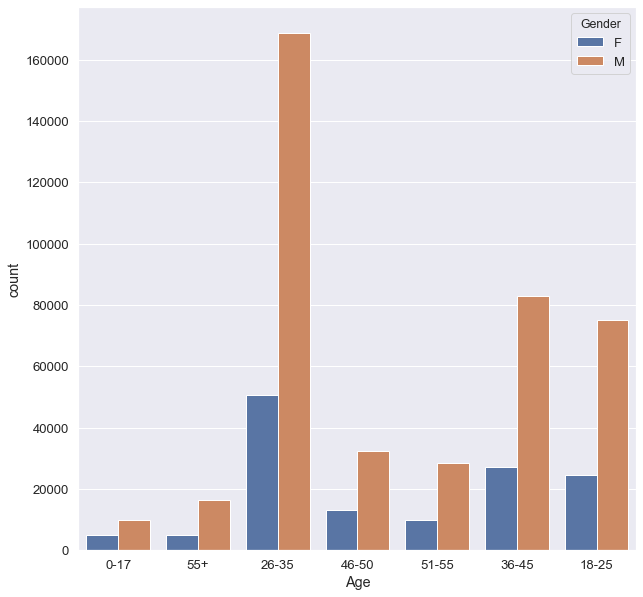

In [14]:
sns.countplot(x='Age', data=df, hue='Gender')

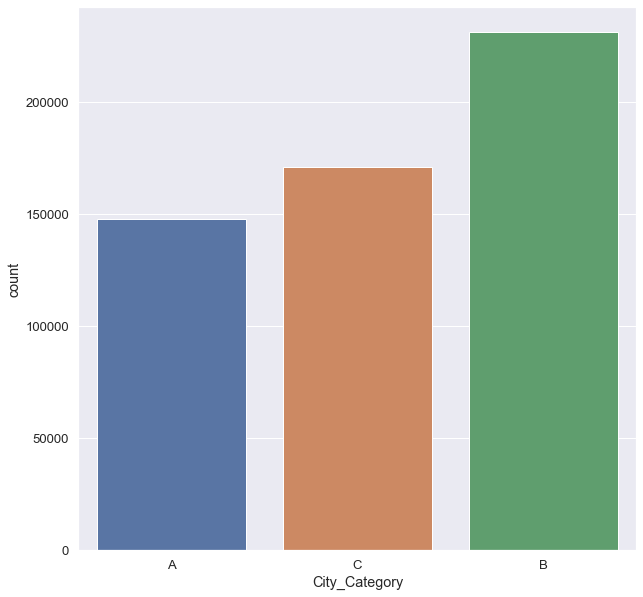

In [15]:
sns.countplot(x='City_Category', data=df)

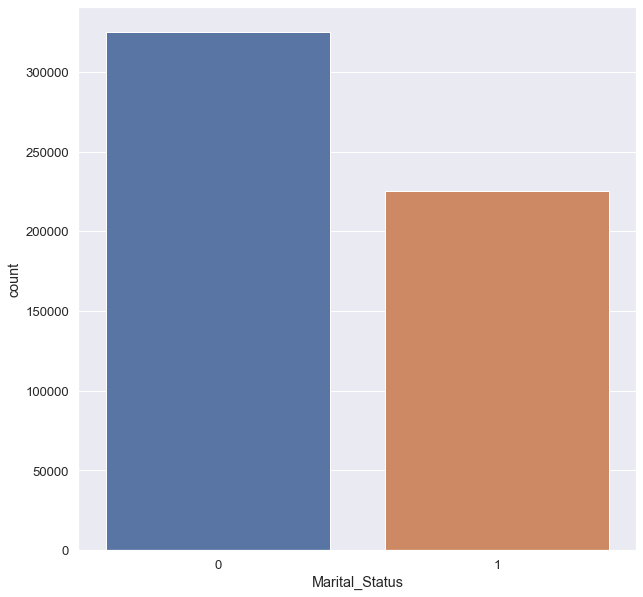

In [16]:
sns.countplot(x='Marital_Status', data=df)

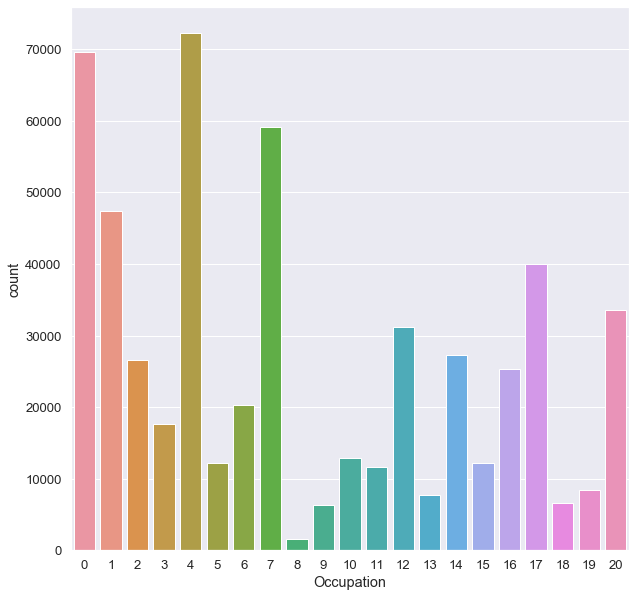

In [17]:
sns.countplot(x='Occupation', data=df)

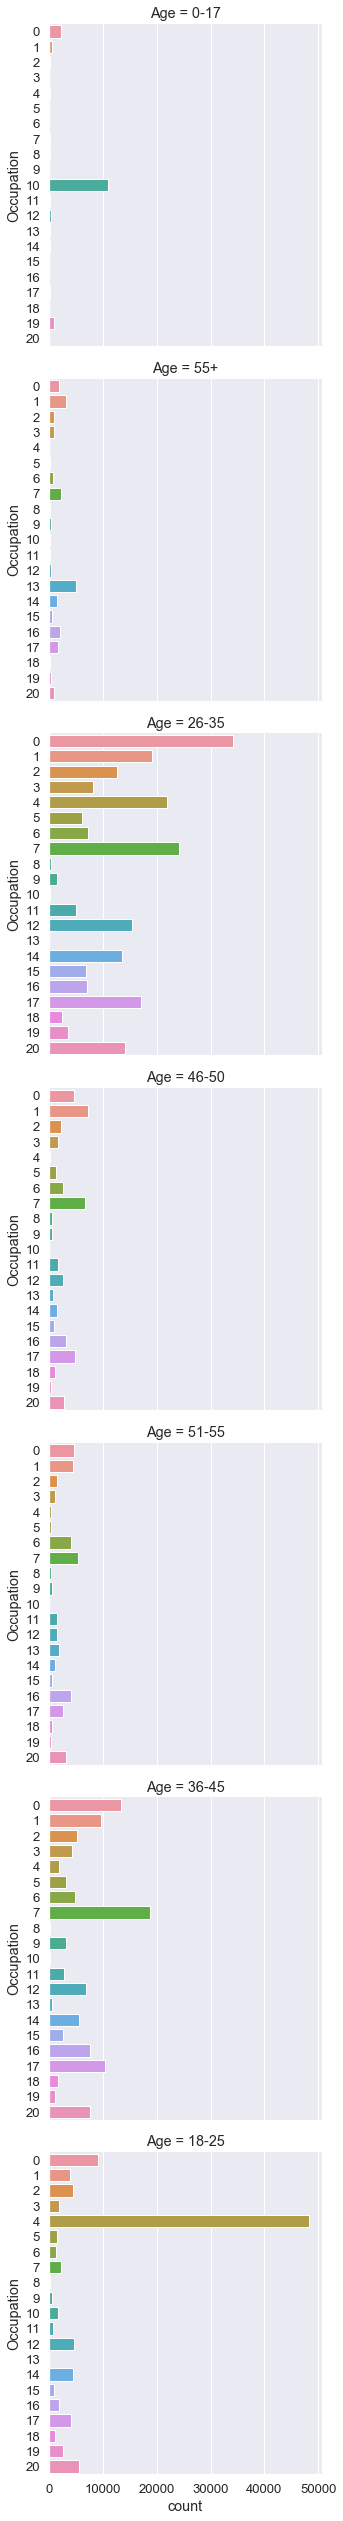

In [18]:
sns.catplot(kind='count', y='Occupation', row='Age', data=df)

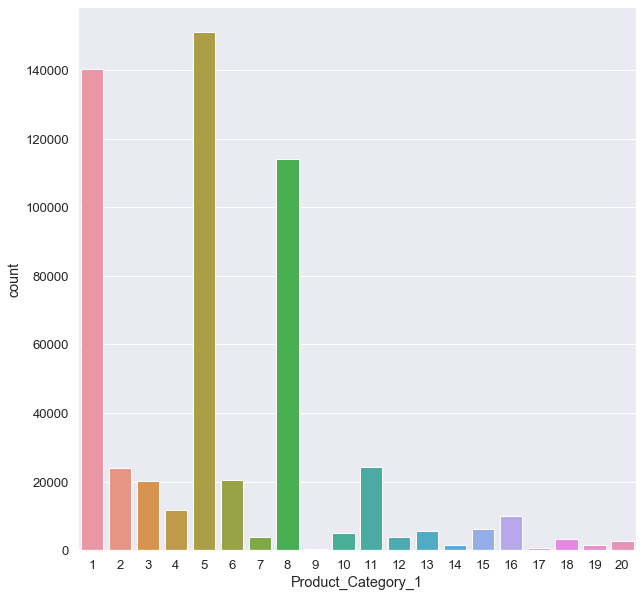

In [19]:
sns.countplot(x='Product_Category_1', data=df)

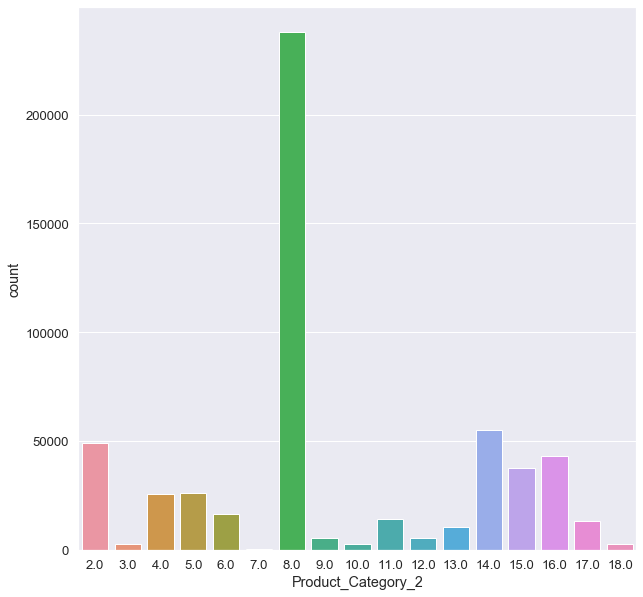

In [20]:
sns.countplot(x='Product_Category_2', data=df)

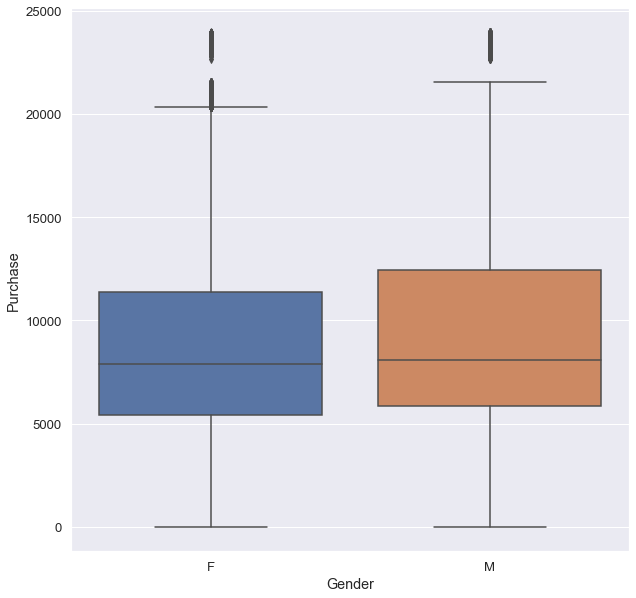

In [21]:
sns.boxplot(x='Gender', y='Purchase', data=df)

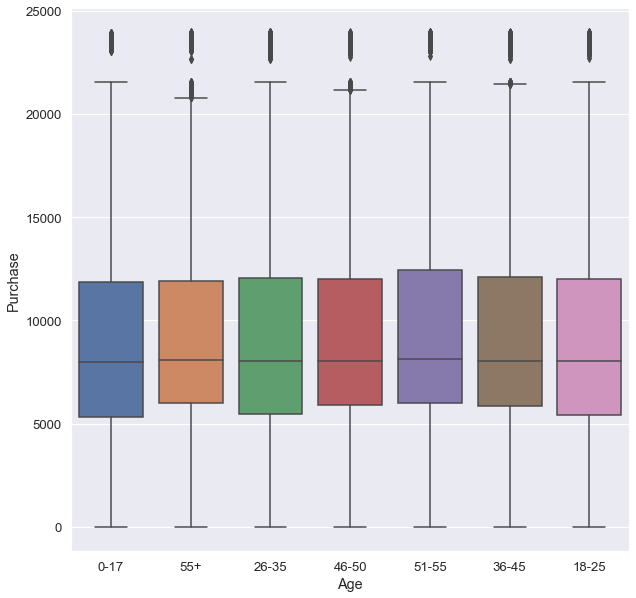

In [22]:
sns.boxplot(x='Age', y='Purchase', data=df)

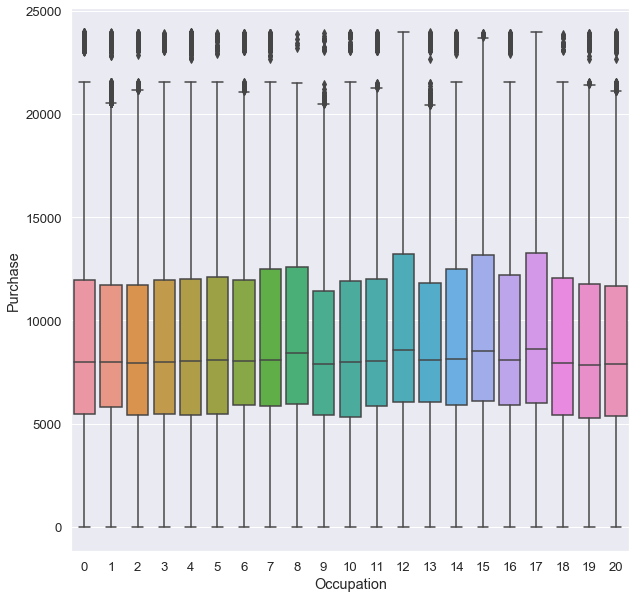

In [23]:
sns.boxplot(x='Occupation', y='Purchase', data=df)

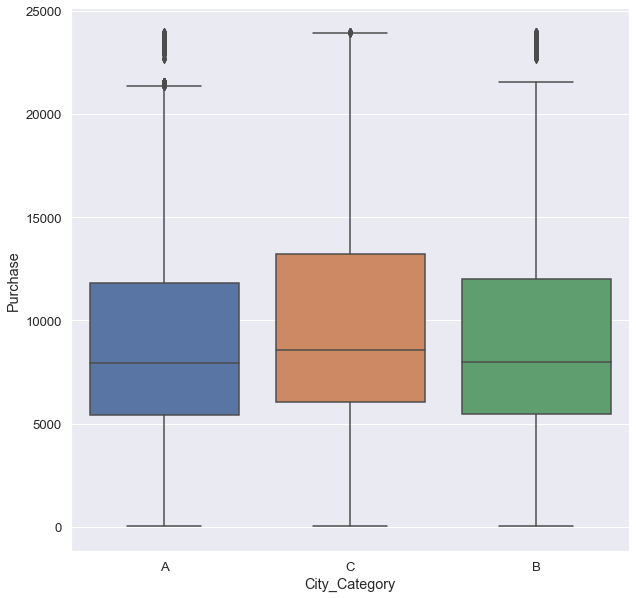

In [24]:
sns.boxplot(x='City_Category', y='Purchase', data=df)

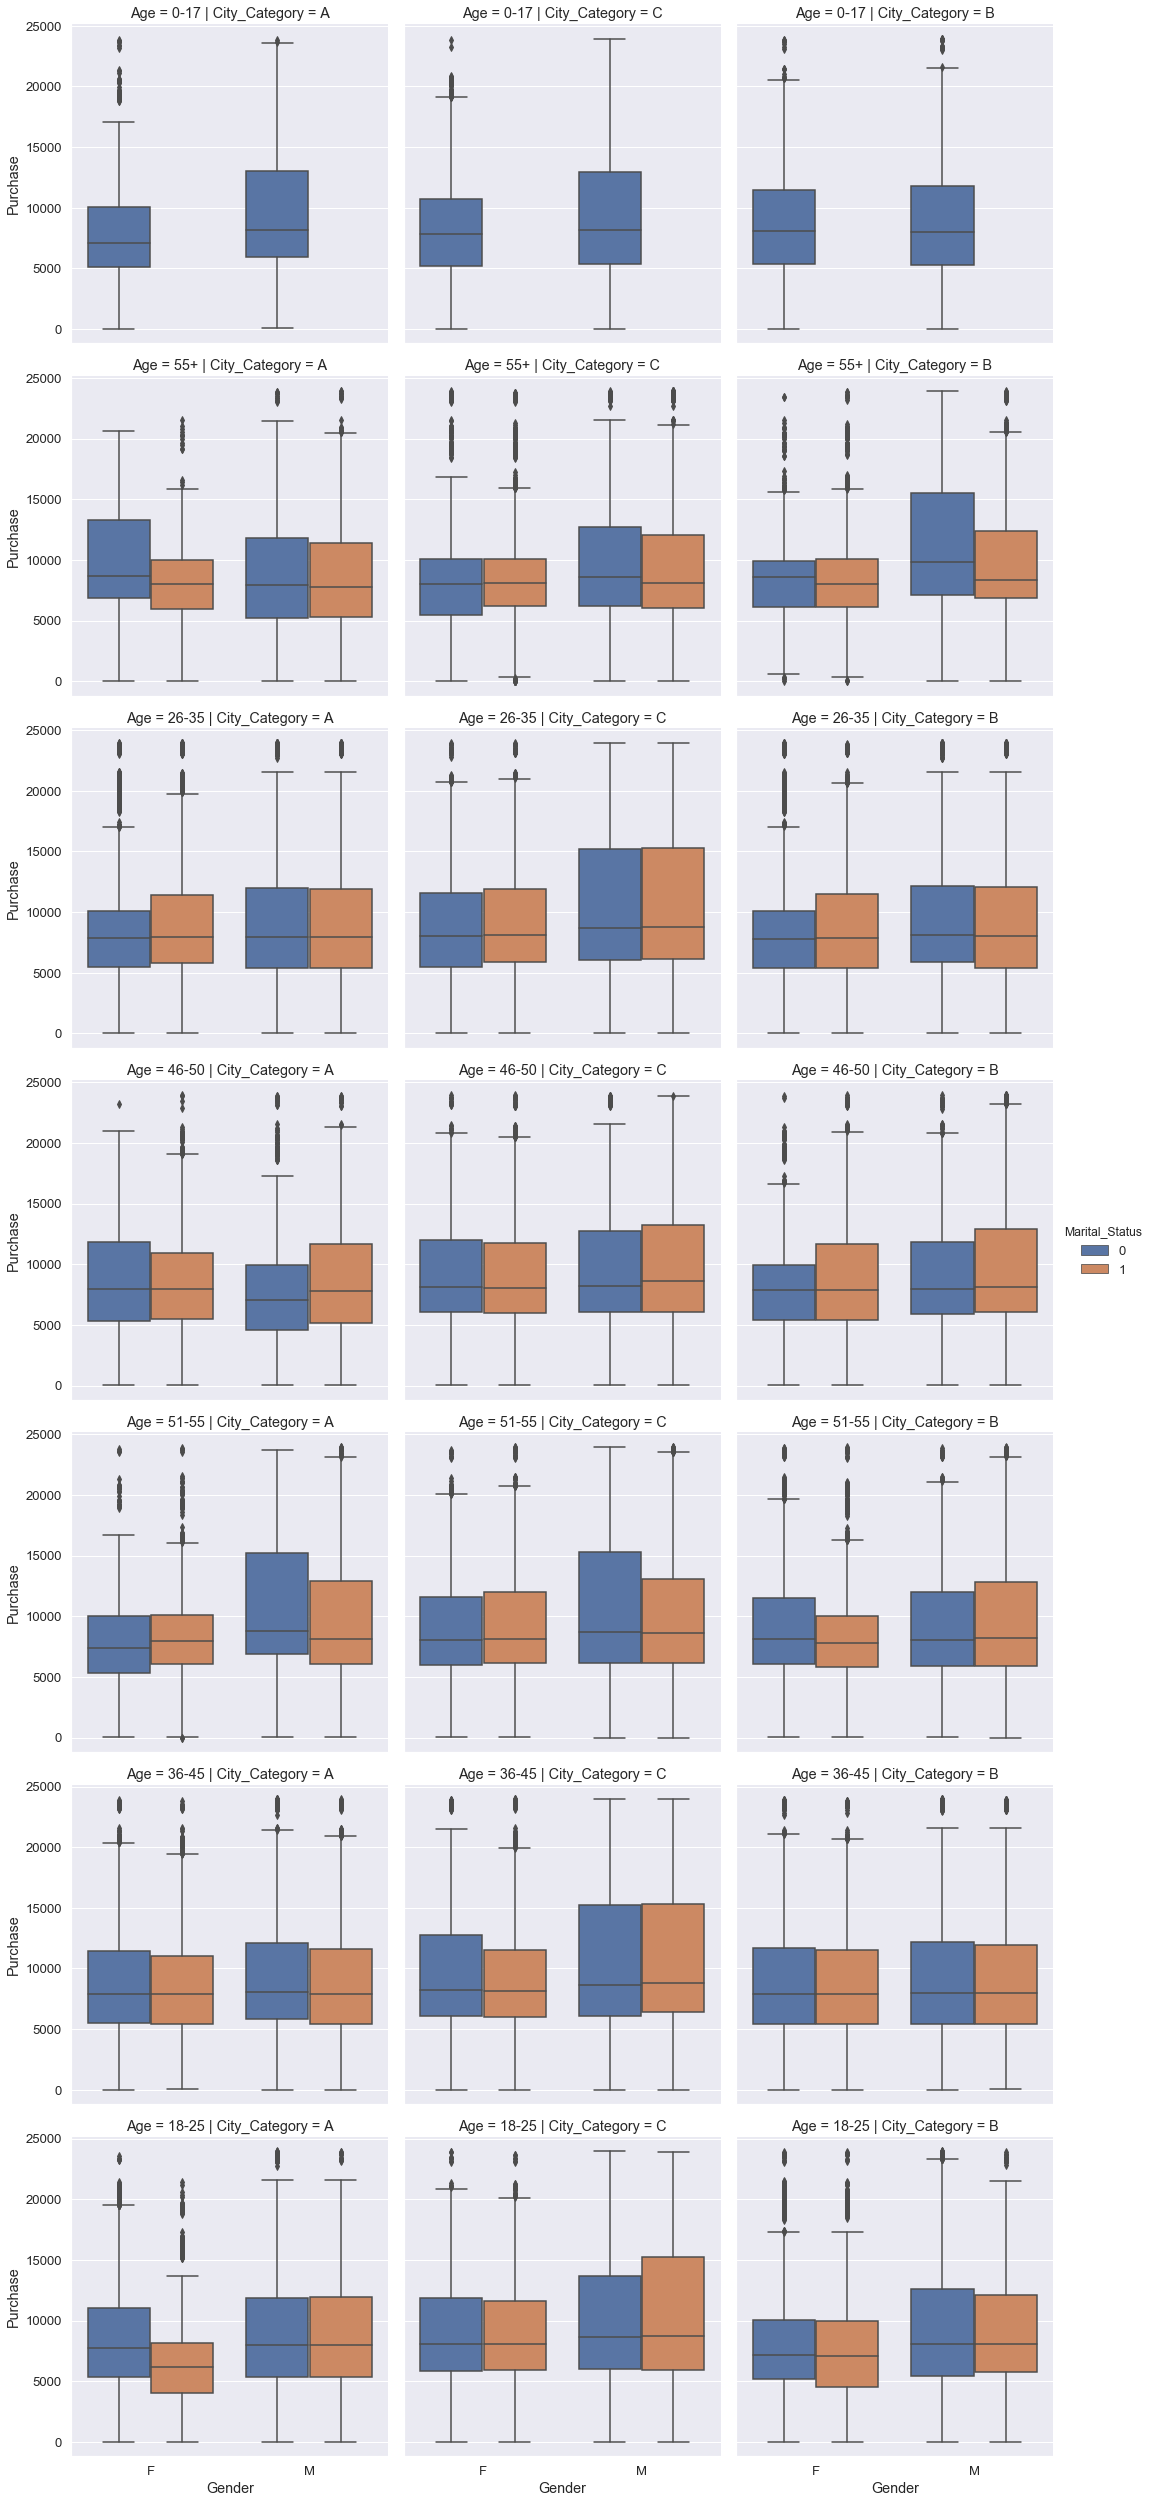

In [25]:
sns.catplot(kind='box', x='Gender', y='Purchase', data=df, row='Age', col='City_Category', hue='Marital_Status')

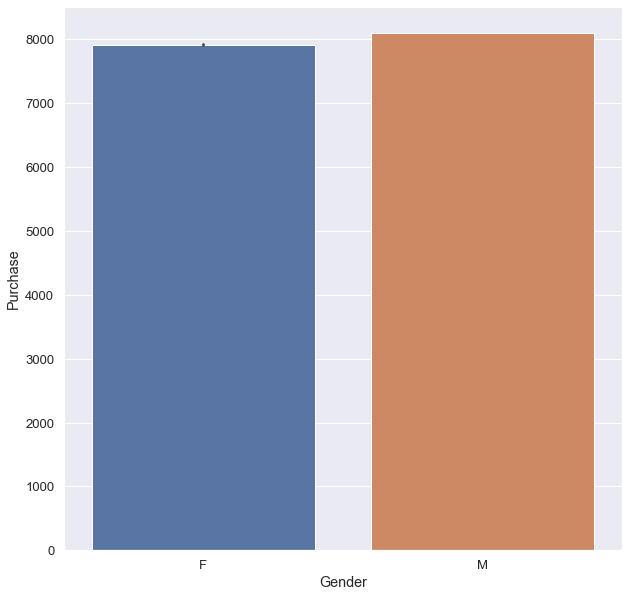

In [26]:
sns.barplot(x='Gender', y='Purchase', data=df, estimator=np.median)

# Outlier

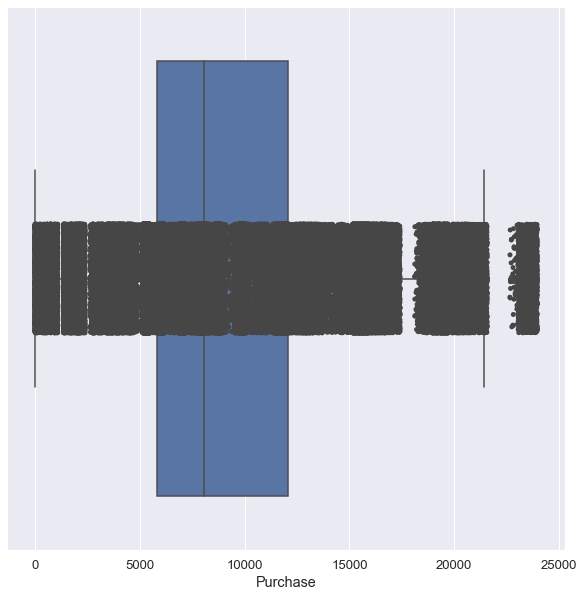

In [27]:
sns.boxplot(x='Purchase', data=df)
sns.stripplot(x='Purchase', data=df, color='#474646')

In [28]:
from datasist.structdata import detect_outliers

In [29]:
df.select_dtypes(include=['number']).columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [30]:
outliers_indices = ds.structdata.detect_outliers(df, 0, df.select_dtypes(include=['number']).columns)
df.drop(outliers_indices, inplace=True)

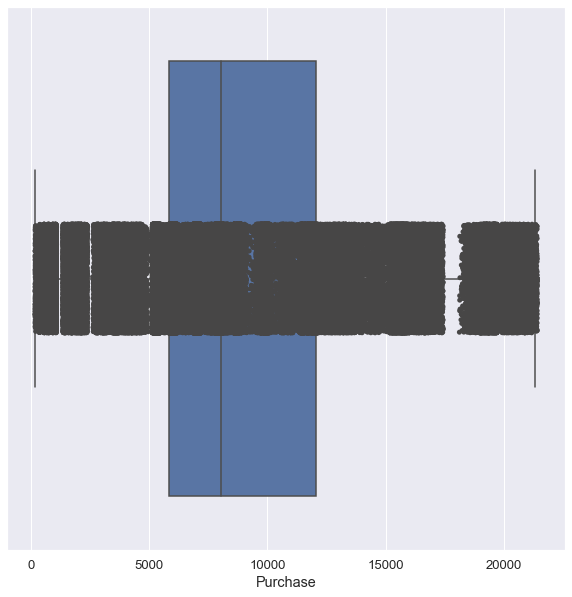

In [31]:
sns.boxplot(x='Purchase', data=df)
sns.stripplot(x='Purchase', data=df, color='#474646')

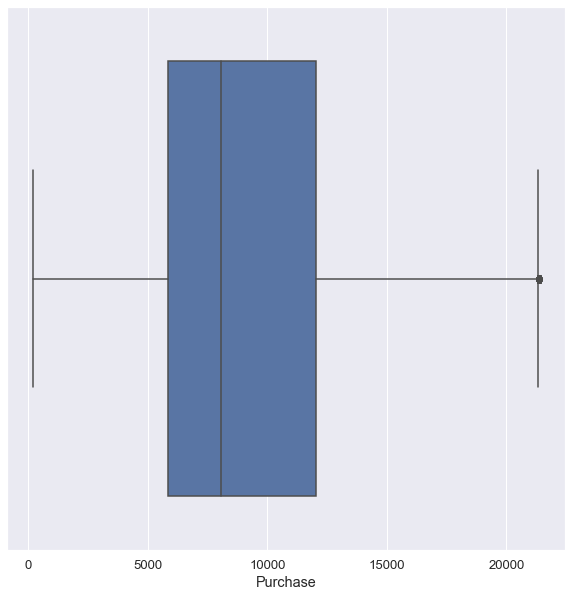

In [32]:
sns.boxplot(x='Purchase', data=df)

# Categorical Data

In [33]:
df = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])
df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,8.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,8.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,8.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545910,6,0,8,8.0,9855,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
545911,6,0,5,8.0,1962,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
545912,6,0,8,8.0,7852,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
545913,6,0,5,8.0,7159,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543238 entries, 0 to 545914
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     543238 non-null  int64  
 1   Marital_Status                 543238 non-null  int64  
 2   Product_Category_1             543238 non-null  int64  
 3   Product_Category_2             543238 non-null  float64
 4   Purchase                       543238 non-null  int64  
 5   Gender_F                       543238 non-null  uint8  
 6   Gender_M                       543238 non-null  uint8  
 7   Age_0-17                       543238 non-null  uint8  
 8   Age_18-25                      543238 non-null  uint8  
 9   Age_26-35                      543238 non-null  uint8  
 10  Age_36-45                      543238 non-null  uint8  
 11  Age_46-50                      543238 non-null  uint8  
 12  Age_51-55                     

# Spliting Data

In [52]:
x = df.drop('Purchase', axis=1)
y = df['Purchase']

In [53]:
x

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,8.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,8.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,8.0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545910,6,0,8,8.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
545911,6,0,5,8.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
545912,6,0,8,8.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
545913,6,0,5,8.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [54]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
545910     9855
545911     1962
545912     7852
545913     7159
545914    11640
Name: Purchase, Length: 543238, dtype: int64

In [55]:
x.shape

(543238, 21)

In [56]:
y.shape

(543238,)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [59]:
x_train

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
176094,7,0,6,8.0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
76335,11,1,1,15.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
239986,1,0,8,16.0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
172748,14,0,2,16.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
148927,2,1,5,14.0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373251,0,0,1,2.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
493710,12,1,5,6.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
473267,16,1,5,8.0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
494203,0,1,1,8.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [60]:
x_train.shape

(434590, 21)

In [61]:
x_test

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
163917,0,0,5,8.0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
143698,0,0,5,8.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
320165,14,1,8,8.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
490866,10,0,7,8.0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
424558,4,0,1,5.0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195359,17,1,17,8.0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
415971,0,1,1,16.0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
467323,4,1,5,8.0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
473976,17,1,8,8.0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [62]:
x_test.shape

(108648, 21)

In [63]:
y_train

176094    16174
76335      4258
239986     5890
172748     9638
148927     5142
          ...  
373251     4293
493710     7029
473267     7105
494203    11789
128668     5408
Name: Purchase, Length: 434590, dtype: int64

In [64]:
y_train.shape

(434590,)

In [65]:
y_test

163917     5268
143698     1908
320165     6069
490866    12221
424558     4494
          ...  
195359    10290
415971     4118
467323     5396
473976     9971
415289    19350
Name: Purchase, Length: 108648, dtype: int64

In [66]:
y_test.shape

(108648,)

# Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_x_train = ss.fit_transform(x_train)
scaled_x_test = ss.fit_transform(x_test)
scaled_x_train = pd.DataFrame(scaled_x_train, columns = x_train.columns)
scaled_x_test = pd.DataFrame(scaled_x_test, columns = x_test.columns)

In [79]:
scaled_x_train

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-0.163846,-0.832142,0.195725,-0.289898,-0.572215,0.572215,-0.167919,-0.470904,1.224293,-0.499292,...,-0.273525,-0.201037,-0.606938,1.170936,-0.668788,-0.395439,1.356614,-0.477009,-0.457442,-0.427155
1,0.449453,1.201718,-1.142106,1.336198,-0.572215,0.572215,-0.167919,-0.470904,1.224293,-0.499292,...,-0.273525,-0.201037,-0.606938,1.170936,-0.668788,-0.395439,-0.737129,2.096397,-0.457442,-0.427155
2,-1.083793,-0.832142,0.730857,1.568498,-0.572215,0.572215,-0.167919,-0.470904,1.224293,-0.499292,...,-0.273525,-0.201037,-0.606938,1.170936,-0.668788,-0.395439,1.356614,-0.477009,-0.457442,-0.427155
3,0.909427,-0.832142,-0.874540,1.568498,-0.572215,0.572215,-0.167919,-0.470904,1.224293,-0.499292,...,-0.273525,-0.201037,-0.606938,1.170936,-0.668788,-0.395439,-0.737129,2.096397,-0.457442,-0.427155
4,-0.930469,1.201718,-0.071841,1.103899,-0.572215,0.572215,-0.167919,-0.470904,-0.816798,2.002838,...,-0.273525,-0.201037,-0.606938,1.170936,-0.668788,-0.395439,1.356614,-0.477009,-0.457442,-0.427155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434585,-1.237118,-0.832142,-1.142106,-1.683695,-0.572215,0.572215,-0.167919,-0.470904,1.224293,-0.499292,...,-0.273525,-0.201037,1.647615,-0.854018,-0.668788,-0.395439,-0.737129,-0.477009,2.186068,-0.427155
434586,0.602777,1.201718,-0.071841,-0.754497,-0.572215,0.572215,-0.167919,-0.470904,-0.816798,2.002838,...,-0.273525,-0.201037,1.647615,-0.854018,-0.668788,-0.395439,1.356614,-0.477009,-0.457442,-0.427155
434587,1.216076,1.201718,-0.071841,-0.289898,-0.572215,0.572215,-0.167919,-0.470904,-0.816798,-0.499292,...,-0.273525,4.974214,-0.606938,-0.854018,1.495242,2.528836,-0.737129,-0.477009,-0.457442,-0.427155
434588,-1.237118,1.201718,-1.142106,-0.289898,-0.572215,0.572215,-0.167919,-0.470904,-0.816798,-0.499292,...,-0.273525,-0.201037,1.647615,-0.854018,-0.668788,-0.395439,1.356614,-0.477009,-0.457442,-0.427155


In [81]:
scaled_x_train.shape

(434590, 21)

In [80]:
scaled_x_test

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.239923,-0.834668,-0.073859,-0.291500,-0.572901,0.572901,-0.167498,-0.470775,-0.813803,-0.501903,...,-0.274364,5.001101,1.645599,-0.850639,-0.671061,2.525464,-0.738663,-0.474986,-0.459238,-0.425345
1,-1.239923,-0.834668,-0.073859,-0.291500,-0.572901,0.572901,-0.167498,-0.470775,1.228798,-0.501903,...,-0.274364,-0.199956,-0.607681,1.175587,-0.671061,-0.395967,-0.738663,-0.474986,-0.459238,2.351035
2,0.904808,1.198081,0.727220,-0.291500,1.745503,-1.745503,-0.167498,-0.470775,1.228798,-0.501903,...,-0.274364,-0.199956,-0.607681,-0.850639,1.490178,-0.395967,-0.738663,-0.474986,2.177518,-0.425345
3,0.292028,-0.834668,0.460193,-0.291500,-0.572901,0.572901,-0.167498,2.124158,-0.813803,-0.501903,...,-0.274364,-0.199956,-0.607681,1.175587,-0.671061,-0.395967,1.353798,-0.474986,-0.459238,-0.425345
4,-0.627143,-0.834668,-1.141965,-0.987975,-0.572901,0.572901,-0.167498,2.124158,-0.813803,-0.501903,...,-0.274364,-0.199956,1.645599,-0.850639,-0.671061,-0.395967,1.353798,-0.474986,-0.459238,-0.425345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108643,1.364393,1.198081,3.130456,-0.291500,-0.572901,0.572901,-0.167498,-0.470775,-0.813803,-0.501903,...,3.644792,-0.199956,-0.607681,1.175587,-0.671061,-0.395967,-0.738663,-0.474986,2.177518,-0.425345
108644,-1.239923,1.198081,-1.141965,1.565769,-0.572901,0.572901,-0.167498,-0.470775,-0.813803,-0.501903,...,3.644792,-0.199956,-0.607681,-0.850639,1.490178,-0.395967,1.353798,-0.474986,-0.459238,-0.425345
108645,-0.627143,1.198081,-0.073859,-0.291500,1.745503,-1.745503,-0.167498,2.124158,-0.813803,-0.501903,...,-0.274364,-0.199956,-0.607681,-0.850639,1.490178,2.525464,-0.738663,-0.474986,-0.459238,-0.425345
108646,1.364393,1.198081,0.727220,-0.291500,-0.572901,0.572901,-0.167498,-0.470775,-0.813803,-0.501903,...,-0.274364,-0.199956,-0.607681,1.175587,-0.671061,-0.395967,1.353798,-0.474986,-0.459238,-0.425345


In [82]:
scaled_x_test.shape

(108648, 21)

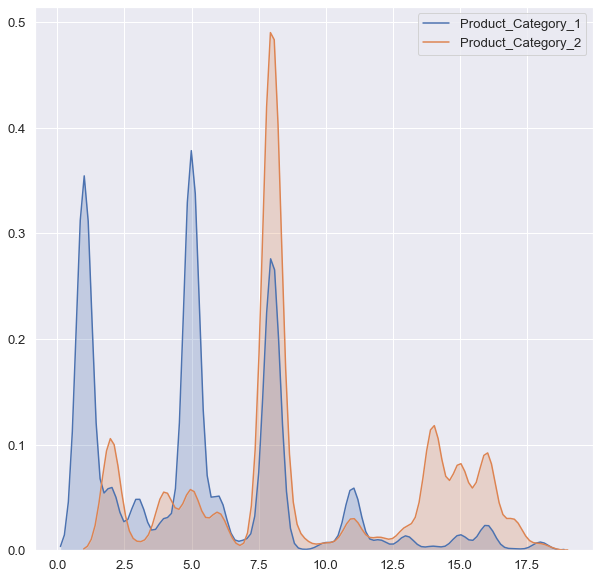

In [89]:
sns.kdeplot(x_train['Product_Category_1'], shade=True)
sns.kdeplot(x_train['Product_Category_2'], shade=True)

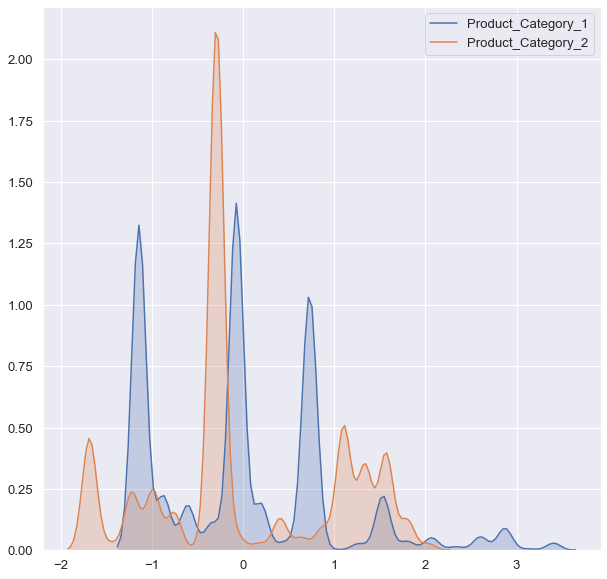

In [90]:
sns.kdeplot(scaled_x_train['Product_Category_1'], shade=True)
sns.kdeplot(scaled_x_train['Product_Category_2'], shade=True)